In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Retrieving

**Downloading the data using the following code in the form of a zip file**

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-07-30 09:46:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   138MB/s    in 1.4s    

2020-07-30 09:46:27 (138 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-07-30 09:46:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]


**Python let us unzip a zipped file using the zipfile library.**

In [3]:
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

**The best part about this zipfile library is that it allows us to make directories in which images are already labelled so there is no need to label them.**

**So, there is a /tmp/rps/ directory in which there are three directories called rock, paper and scissors. There is no need to remember these statements; you can just copy paste it wherever you want.**

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-002.png', 'rock02-000.png', 'rock02-051.png', 'rock07-k03-032.png', 'rock04-097.png', 'rock07-k03-110.png', 'rock01-087.png', 'rock05ck01-089.png', 'rock02-103.png', 'rock07-k03-087.png']
['paper05-112.png', 'paper01-014.png', 'paper04-063.png', 'paper03-115.png', 'paper06-083.png', 'paper02-060.png', 'paper07-044.png', 'paper03-059.png', 'paper05-011.png', 'paper07-078.png']
['testscissors03-044.png', 'scissors03-030.png', 'testscissors03-065.png', 'scissors02-099.png', 'testscissors03-050.png', 'testscissors02-087.png', 'scissors01-060.png', 'scissors01-082.png', 'scissors04-109.png', 'testscissors03-104.png']


**Here I am showing you some images which are part of this dataset.**

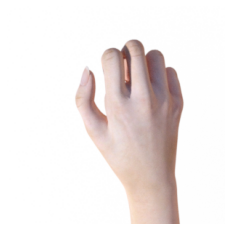

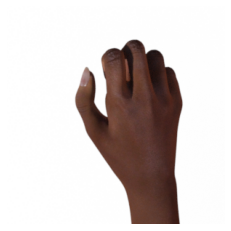

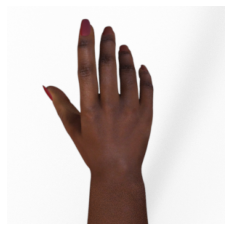

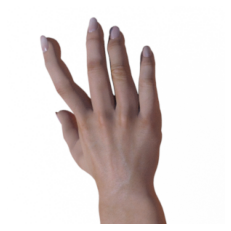

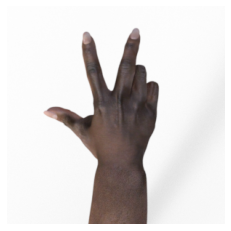

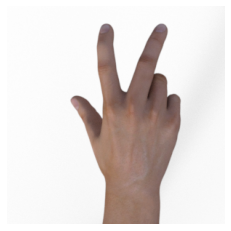

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[:2]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[:2]]
next_scissors = [os.path.join(scissors_dir, fname) 
                   for fname in scissors_files[:2]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

**Since there are two directories train and test, we have to use ImageDataGenerator. Now, you must be thinking why I have specified so many attributes in the training_datagen but not in test_datagen excpet for rescaling(allows us to get values between 0 and 1). The answer to that is we want to train our model using these attributes and then test it on raw images.**

**If you are having trouble grasping this code, there is no need to except for the path, target_size, and batch_size.**

In [6]:
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rps/"
training_datagen = ImageDataGenerator(
                   rescale = 1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)


test_dir = "/tmp/rps-test-set/"
test_datagen = ImageDataGenerator(
               rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                  training_dir,
                  target_size=(150,150),
                  class_mode='categorical',
                  batch_size=126)

test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size=(150,150),
                  class_mode='categorical',
                  batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


**Now, here comes the most interesting part. Import tensorflow and keras_preprocessing.**

**Our model type is Sequential with 4 convolution layers(You can experiment with any number of layers with first having the input_shape). The first parameter in the convolution layer is the no. of filters(Filters are nothing but parameters which store information about each pixel in our image. You can try different filters as required by your model) you wanna have and second being the kernel_size. Pooling is nothing but retrieving a selcted value out of the specified size of matrix(MaxPooling2D means taking the largest value amomg all in a 2D matrix).**

**Strides and Dropout are used to reduce overfitting(You can learn more about them in Kaggle DeepLearning microcourse)**

**After adding all the convolution layers, we Flatten them and then add a hidden layer of 512 neurons followed by another Dense layer(This layer is used for prediction) containing 3 classes and softmax function(This function is used to get probabilities about each class e.g how much likely is this image to be an ankle boot)**

**Finally compile and fit the model.**

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # This is the second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', strides=2),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # This is the third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # This is the fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = test_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         1

**This plot is used to show the training and testing accuracy over total epochs.**

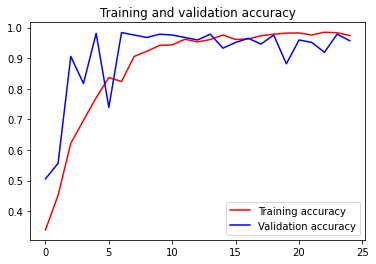

<Figure size 432x288 with 0 Axes>

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

*Hope you liked this notebook and learned something from it and don't forget to hit the upvote button.THANK YOU!!*